In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv("SalaryGender.csv")
df.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  100 non-null    float64
 1   Gender  100 non-null    int64  
 2   Age     100 non-null    int64  
 3   PhD     100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [46]:
df.shape

(100, 4)

In [47]:
df.isnull().sum()

Salary    0
Gender    0
Age       0
PhD       0
dtype: int64

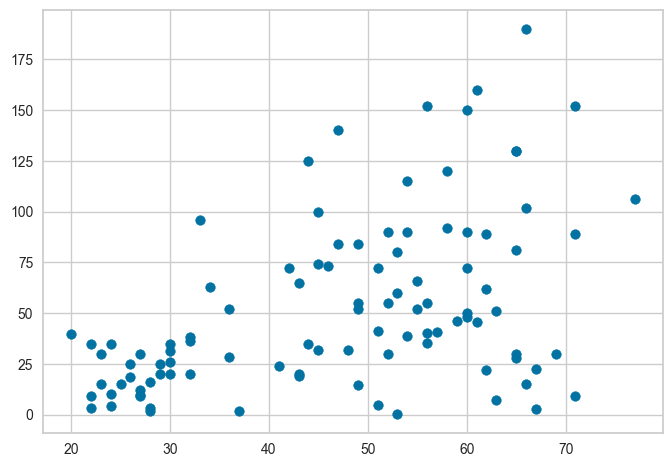

In [48]:
plt.scatter(df.Age, df.Salary);

In [49]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [50]:
# transformer = MinMaxScaler()
# df[["Salary", "Gender", "Age","PhD"]] = transformer.fit_transform(df[["Salary", "Gender", "Age","PhD"]])
# df
df = df[["Salary", "Gender", "Age","PhD"]]
df.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [51]:
model = KMeans(n_clusters=4, random_state=42)
y_predictions = model.fit_predict(df)

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
y_predictions

array([2, 3, 3, 0, 1, 0, 1, 0, 2, 3, 0, 3, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0,
       3, 3, 0, 3, 0, 0, 1, 1, 1, 1, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1, 1, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 1, 0, 2, 1, 3, 0, 1, 0, 1, 3, 3, 3,
       0, 0, 3, 0, 3, 0, 0, 2, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 0, 3, 3, 1,
       1, 3, 1, 0, 3, 2, 1, 0, 2, 0, 3, 0])

In [53]:
df["Cluster"] = y_predictions

In [54]:
df.head()

,Salary,Gender,Age,PhD,Cluster
0,140.0,1,47,1,2
1,30.0,0,65,1,3
2,35.1,0,56,0,3
3,30.0,1,23,0,0
4,80.0,0,53,1,1


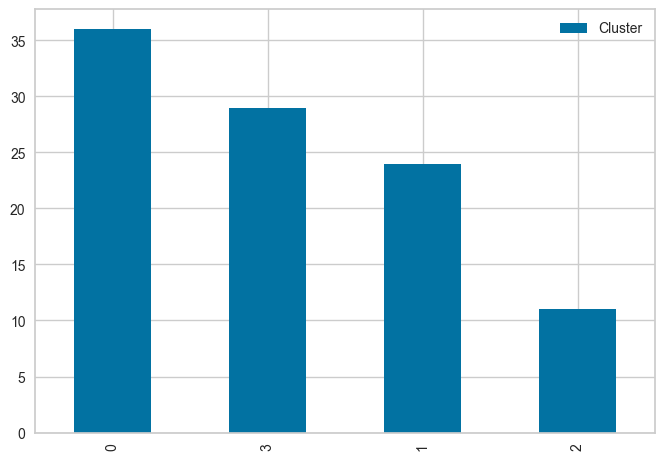

In [55]:
df["Cluster"].value_counts().plot.bar().legend();

In [56]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]

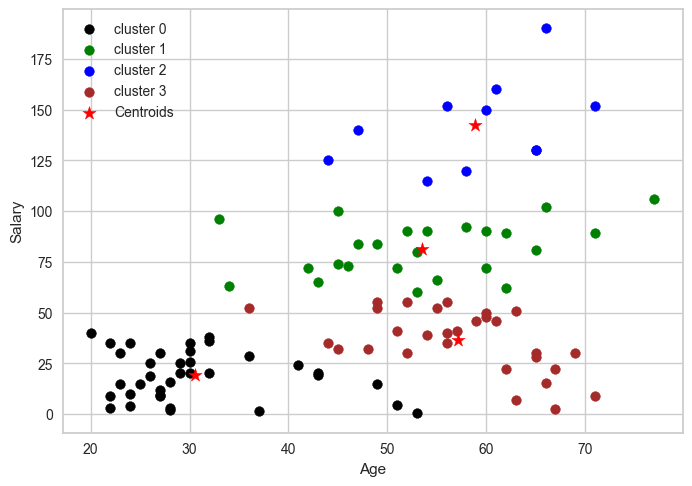

In [57]:
plt.scatter(df1.Age, df1.Salary, color="black", label="cluster 0");
plt.scatter(df2.Age, df2.Salary, color="green", label="cluster 1");
plt.scatter(df3.Age, df3.Salary, color="blue", label="cluster 2");
plt.scatter(df4.Age, df4.Salary, color="brown", label="cluster 3");

plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 0], s=100, marker="*", label="Centroids", color="red");

plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend();

In [58]:
model.feature_names_in_

array(['Salary', 'Gender', 'Age', 'PhD'], dtype=object)

In [59]:
data = df[["Salary", "Gender", "Age","PhD"]]

In [63]:
# inertia = []
# k_range = range(1, 20)
# for k in k_range:
#     km = KMeans(n_clusters=k)
#     km.fit(data)
#     inertia.append(km.inertia_)

# plt.plot(k_range, inertia);

In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [65]:
label = model.labels_

In [21]:
silhouette_score(data, label)

0.49012960913450426

In [66]:
davies_bouldin_score(data, label)

0.7421508377434614

In [67]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

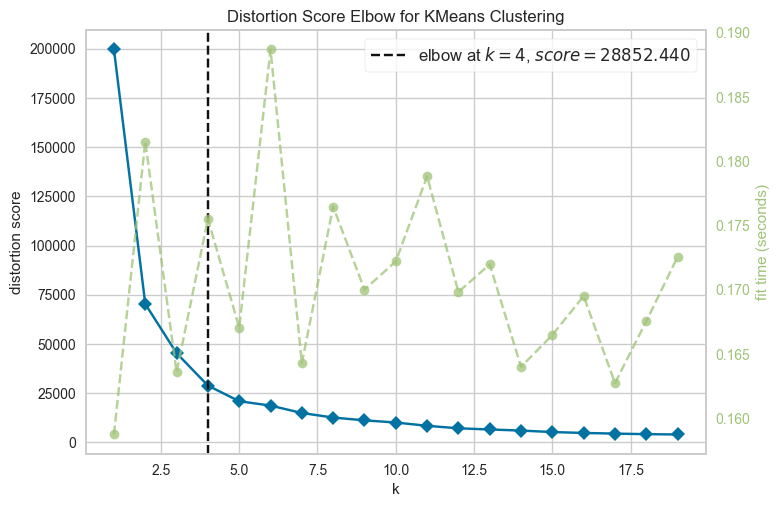

In [68]:
kms = KMeans(random_state=0, n_init='auto')
viz = KElbowVisualizer(kms, k=(1, 20))
viz.fit(data)
viz.show();

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


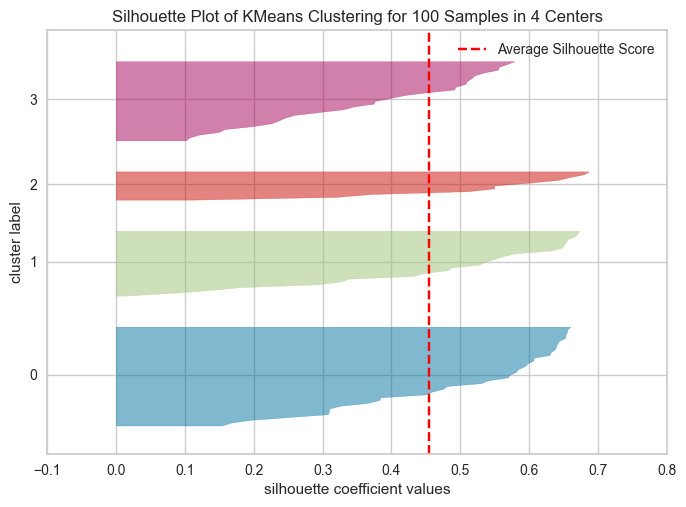

In [75]:
viz_s = SilhouetteVisualizer(model, colors='yellowbrick')
viz_s.fit(data)
viz_s.show();